In [4]:
!pip install -q kaggle
import pandas as pd

# Direct load from GitHub (no download needed!)
url = 'https://raw.githubusercontent.com/SteffiPeTaffy/machineLearningAZ/master/Machine%20Learning%20A-Z%20Template%20Folder/Part%204%20-%20Clustering/Section%2025%20-%20Hierarchical%20Clustering/Mall_Customers.csv'
df = pd.read_csv(url)
print(f"✅ Loaded {len(df)} customers | {df.shape[1]} features")
df.head()

✅ Loaded 200 customers | 5 features


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


🎯 K-MEANS CUSTOMER SEGMENTATION PROJECT

📊 STEP 1: DATA LOADING & EXPLORATION
----------------------------------------------------------------------
Dataset Shape: (200, 5)
Columns: ['CustomerID', 'Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']

Missing Values:
CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Data Types:
CustomerID                 int64
Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

Basic Statistics:
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000             

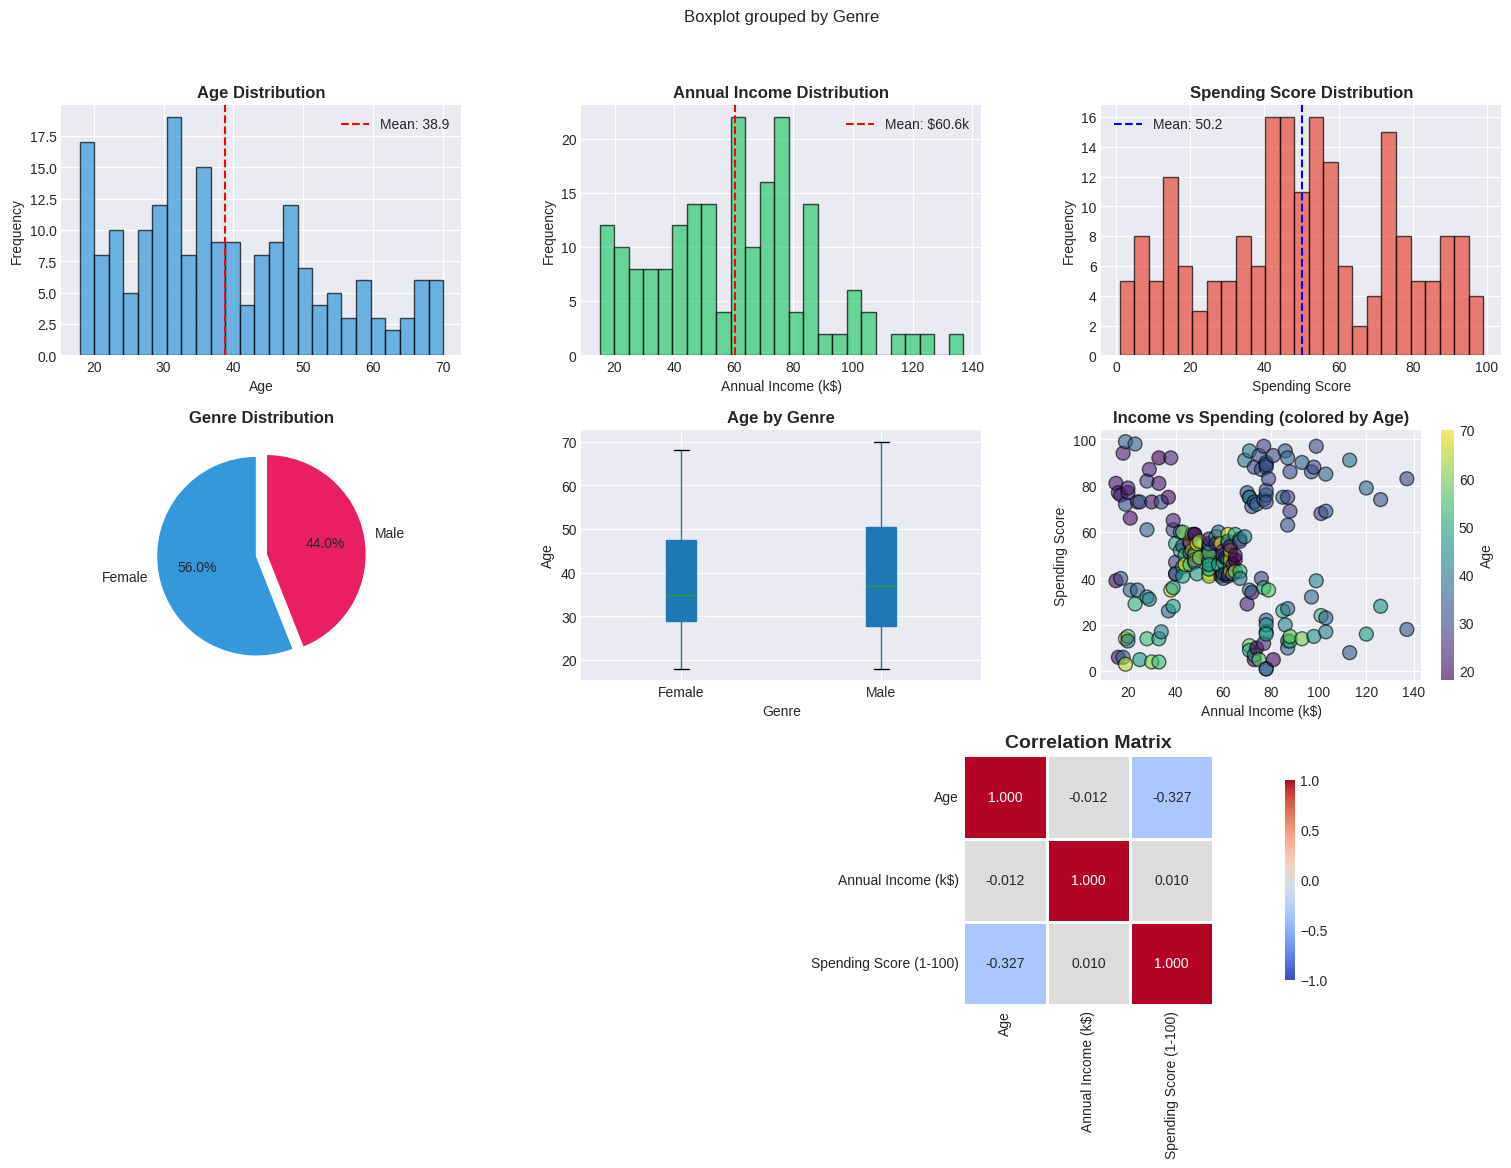

✅ Comprehensive EDA visualization created!

🔧 STEP 3: DATA PREPROCESSING
----------------------------------------------------------------------
Selected Features: Annual Income & Spending Score
Data Shape: (200, 2)
✅ Data standardized (mean=0, std=1)

🔍 STEP 4: FINDING OPTIMAL K
----------------------------------------------------------------------
📊 Tested K values: [2, 3, 4, 5, 6, 7, 8, 9, 10]
🎯 Optimal K (based on silhouette score): 5


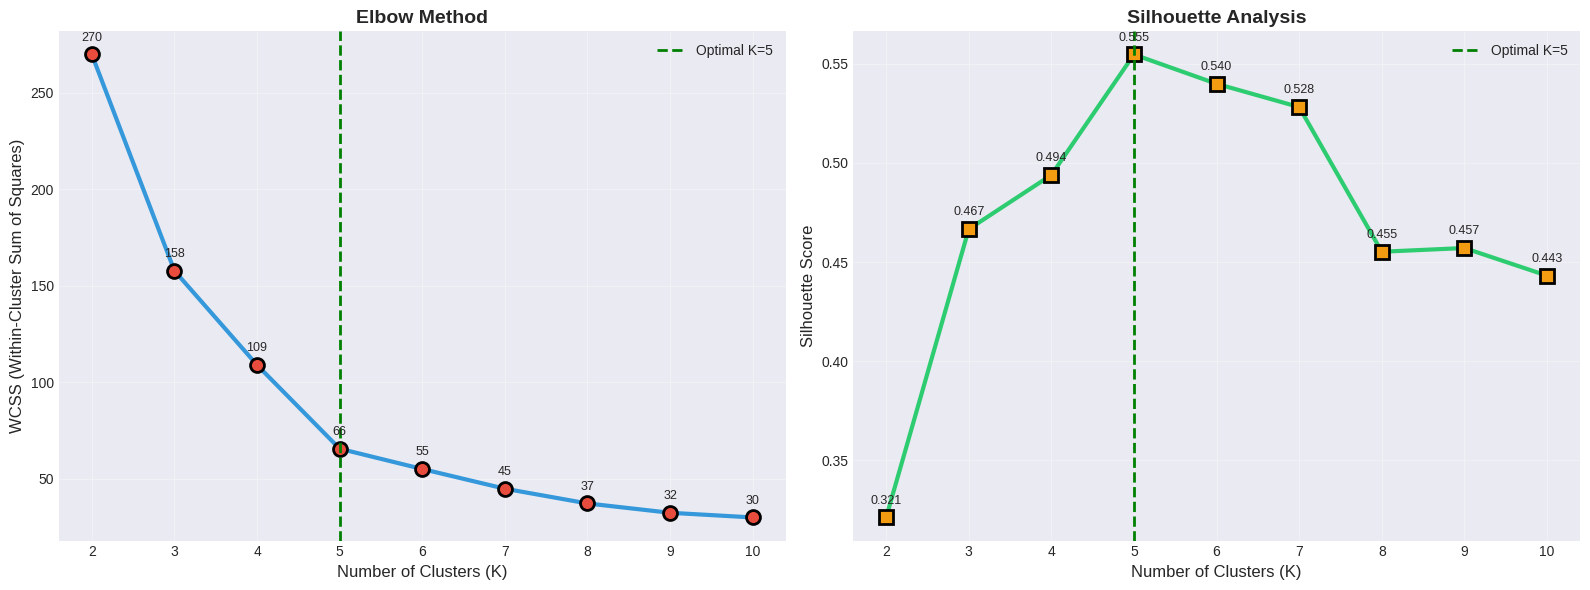

✅ Optimal K determination complete!

Metrics Summary:
K=2: WCSS=269.69, Silhouette=0.321
K=3: WCSS=157.70, Silhouette=0.467
K=4: WCSS=108.92, Silhouette=0.494
K=5: WCSS=65.57, Silhouette=0.555
K=6: WCSS=55.06, Silhouette=0.540
K=7: WCSS=44.86, Silhouette=0.528
K=8: WCSS=37.23, Silhouette=0.455
K=9: WCSS=32.39, Silhouette=0.457
K=10: WCSS=29.98, Silhouette=0.443

🤖 STEP 5: TRAINING K-MEANS MODEL (K=5)
----------------------------------------------------------------------
✅ Model trained successfully!
Iterations to converge: 4
Final WCSS: 65.57
Silhouette Score: 0.555

📊 Cluster Distribution:
Cluster 1: 81 customers (40.5%)
Cluster 2: 39 customers (19.5%)
Cluster 3: 22 customers (11.0%)
Cluster 4: 35 customers (17.5%)
Cluster 5: 23 customers (11.5%)

🎨 STEP 6: CREATING CLUSTER VISUALIZATIONS
----------------------------------------------------------------------


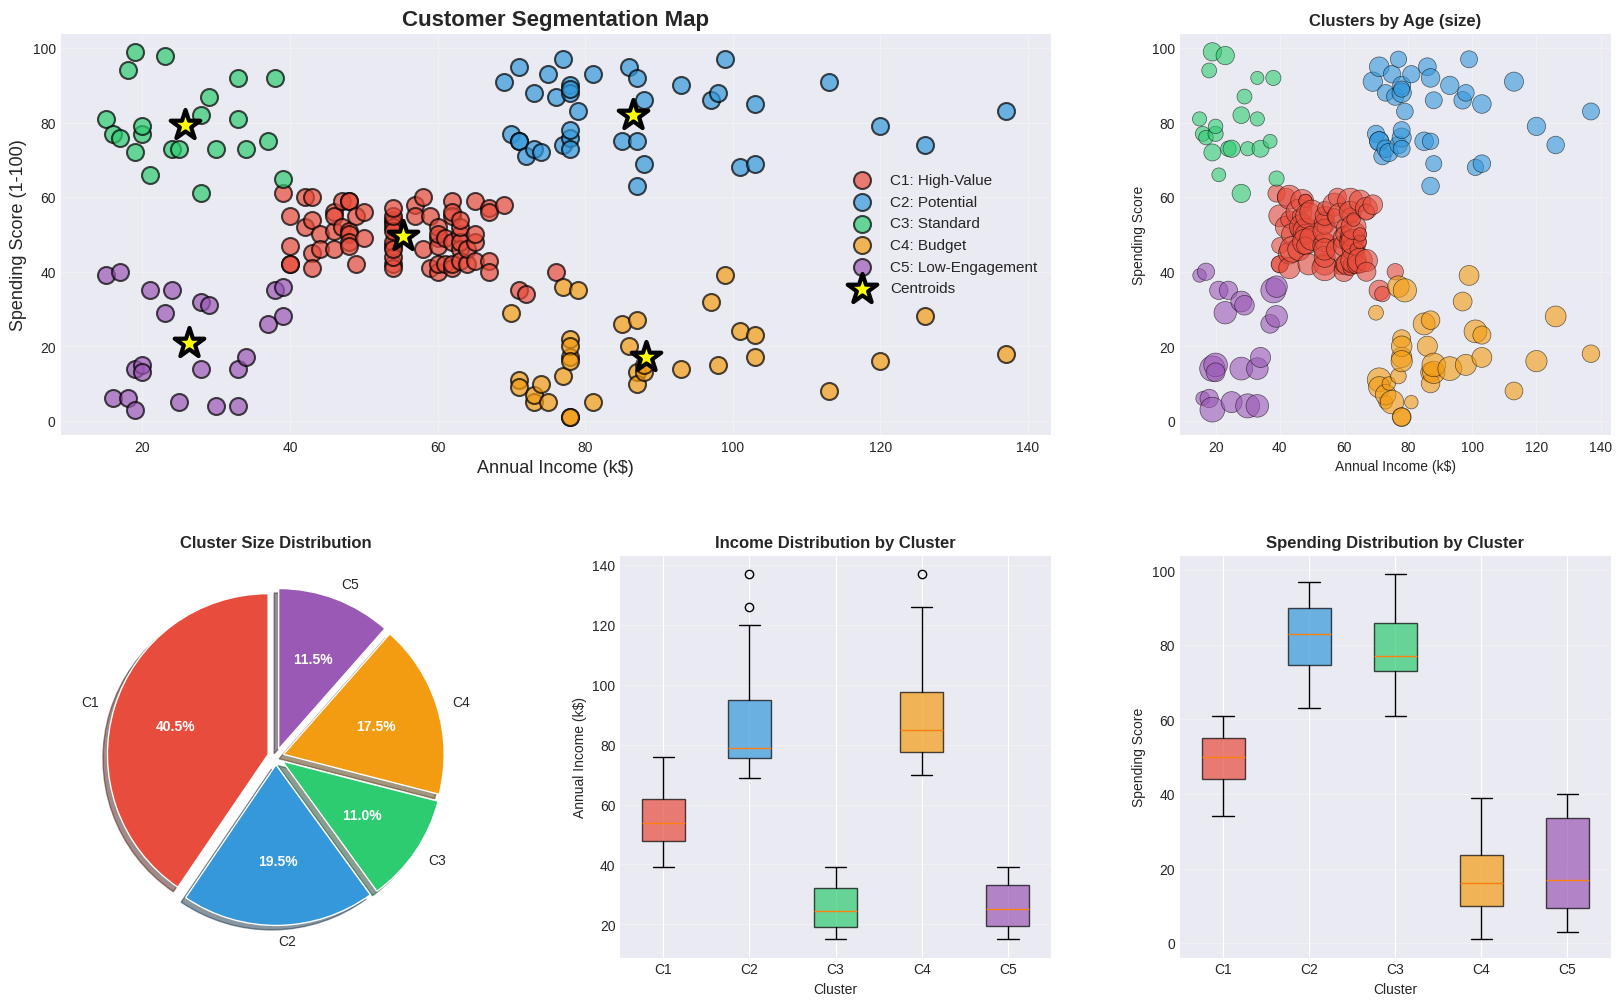

✅ Advanced cluster visualizations created!

📋 STEP 7: DETAILED CLUSTER PROFILING
  Cluster           Name  Size Percentage Avg_Age Avg_Income Avg_Spending  Male_Count  Female_Count
Cluster 1     High-Value    81      40.5%    42.7     $55.3k         49.5          33            48
Cluster 2      Potential    39      19.5%    32.7     $86.5k         82.1          18            21
Cluster 3       Standard    22      11.0%    25.3     $25.7k         79.4           9            13
Cluster 4         Budget    35      17.5%    41.1     $88.2k         17.1          19            16
Cluster 5 Low-Engagement    23      11.5%    45.2     $26.3k         20.9           9            14

COMPREHENSIVE CLUSTER INSIGHTS

🏷️  CLUSTER 1: HIGH-VALUE

📊 Demographics:
   • Size: 81 customers (40.5%)
   • Age: 42.7 ± 16.4 years
   • Age Range: 18-70 years

💰 Financial Profile:
   • Annual Income: $55.3k ± 9.0k
   • Income Range: $39k - $76k
   • Median Income: $54.0k

🛍️ Spending Behavior:
   • Spending Scor

In [5]:
# ============================================================================
# K-MEANS CUSTOMER SEGMENTATION - COMPLETE IMPLEMENTATION (FIXED)
# Task: SCT_ML_2 | SkillCraft Technology Internship
# ============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

# Set style
sns.set_style('whitegrid')
plt.style.use('seaborn-v0_8-darkgrid')

print("🎯 K-MEANS CUSTOMER SEGMENTATION PROJECT")
print("="*70 + "\n")

# ============================================================================
# 1. DATA LOADING & EXPLORATION
# ============================================================================
print("📊 STEP 1: DATA LOADING & EXPLORATION")
print("-"*70)

# Load data (already loaded, using existing df)
# Check data quality
print(f"Dataset Shape: {df.shape}")
print(f"Columns: {list(df.columns)}")
print(f"\nMissing Values:\n{df.isnull().sum()}")
print(f"\nData Types:\n{df.dtypes}")
print(f"\nBasic Statistics:\n{df.describe()}")

# ============================================================================
# 2. COMPREHENSIVE VISUALIZATION SUITE
# ============================================================================
print("\n📈 STEP 2: CREATING VISUALIZATIONS")
print("-"*70)

# Figure 1: Data Distribution Overview (2x3 grid)
fig = plt.figure(figsize=(18, 12))
gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)

# Age distribution
ax1 = fig.add_subplot(gs[0, 0])
ax1.hist(df['Age'], bins=25, color='#3498db', edgecolor='black', alpha=0.7)
ax1.set_title('Age Distribution', fontweight='bold', fontsize=12)
ax1.set_xlabel('Age')
ax1.set_ylabel('Frequency')
ax1.axvline(df['Age'].mean(), color='red', linestyle='--', label=f'Mean: {df["Age"].mean():.1f}')
ax1.legend()

# Income distribution
ax2 = fig.add_subplot(gs[0, 1])
ax2.hist(df['Annual Income (k$)'], bins=25, color='#2ecc71', edgecolor='black', alpha=0.7)
ax2.set_title('Annual Income Distribution', fontweight='bold', fontsize=12)
ax2.set_xlabel('Annual Income (k$)')
ax2.set_ylabel('Frequency')
ax2.axvline(df['Annual Income (k$)'].mean(), color='red', linestyle='--', label=f'Mean: ${df["Annual Income (k$)"].mean():.1f}k')
ax2.legend()

# Spending Score distribution
ax3 = fig.add_subplot(gs[0, 2])
ax3.hist(df['Spending Score (1-100)'], bins=25, color='#e74c3c', edgecolor='black', alpha=0.7)
ax3.set_title('Spending Score Distribution', fontweight='bold', fontsize=12)
ax3.set_xlabel('Spending Score')
ax3.set_ylabel('Frequency')
ax3.axvline(df['Spending Score (1-100)'].mean(), color='blue', linestyle='--', label=f'Mean: {df["Spending Score (1-100)"].mean():.1f}')
ax3.legend()

# Genre distribution (pie chart) - FIXED: Using 'Genre' not 'Gender'
ax4 = fig.add_subplot(gs[1, 0])
genre_counts = df['Genre'].value_counts()
colors_pie = ['#3498db', '#e91e63']
ax4.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%',
        colors=colors_pie, startangle=90, explode=(0.05, 0.05))
ax4.set_title('Genre Distribution', fontweight='bold', fontsize=12)

# Age by Genre (box plot) - FIXED
ax5 = fig.add_subplot(gs[1, 1])
df.boxplot(column='Age', by='Genre', ax=ax5, patch_artist=True)
ax5.set_title('Age by Genre', fontweight='bold', fontsize=12)
ax5.set_xlabel('Genre')
ax5.set_ylabel('Age')
plt.sca(ax5)
plt.xticks(rotation=0)

# Income vs Spending (scatter)
ax6 = fig.add_subplot(gs[1, 2])
scatter = ax6.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'],
                     c=df['Age'], cmap='viridis', s=100, alpha=0.6, edgecolors='black')
ax6.set_title('Income vs Spending (colored by Age)', fontweight='bold', fontsize=12)
ax6.set_xlabel('Annual Income (k$)')
ax6.set_ylabel('Spending Score')
plt.colorbar(scatter, ax=ax6, label='Age')

# Correlation heatmap
ax7 = fig.add_subplot(gs[2, :])
corr_data = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].corr()
sns.heatmap(corr_data, annot=True, fmt='.3f', cmap='coolwarm', center=0,
            square=True, linewidths=2, cbar_kws={"shrink": 0.8}, ax=ax7, vmin=-1, vmax=1)
ax7.set_title('Correlation Matrix', fontweight='bold', fontsize=14)

plt.savefig('comprehensive_eda.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

print("✅ Comprehensive EDA visualization created!")

# ============================================================================
# 3. DATA PREPROCESSING
# ============================================================================
print("\n🔧 STEP 3: DATA PREPROCESSING")
print("-"*70)

# Select features
X = df[['Annual Income (k$)', 'Spending Score (1-100)']].values
print(f"Selected Features: Annual Income & Spending Score")
print(f"Data Shape: {X.shape}")

# Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(f"✅ Data standardized (mean=0, std=1)")

# ============================================================================
# 4. OPTIMAL K DETERMINATION (Enhanced)
# ============================================================================
print("\n🔍 STEP 4: FINDING OPTIMAL K")
print("-"*70)

# Calculate metrics for different K values
K_range = range(2, 11)
wcss_values = []
silhouette_scores = []

for k in K_range:
    kmeans_temp = KMeans(n_clusters=k, init='k-means++', random_state=42,
                        n_init=10, max_iter=300)
    labels = kmeans_temp.fit_predict(X_scaled)
    wcss_values.append(kmeans_temp.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, labels))

# Find optimal K (where silhouette score is high)
optimal_k = silhouette_scores.index(max(silhouette_scores)) + 2

print(f"📊 Tested K values: {list(K_range)}")
print(f"🎯 Optimal K (based on silhouette score): {optimal_k}")

# Visualization: Elbow + Silhouette
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Elbow Method
ax1.plot(K_range, wcss_values, marker='o', linewidth=3, markersize=10,
         color='#3498db', markerfacecolor='#e74c3c', markeredgecolor='black', markeredgewidth=2)
ax1.set_title('Elbow Method', fontweight='bold', fontsize=14)
ax1.set_xlabel('Number of Clusters (K)', fontsize=12)
ax1.set_ylabel('WCSS (Within-Cluster Sum of Squares)', fontsize=12)
ax1.axvline(optimal_k, color='green', linestyle='--', linewidth=2, label=f'Optimal K={optimal_k}')
ax1.grid(True, alpha=0.3)
ax1.legend()

# Add value annotations
for k, wcss in zip(K_range, wcss_values):
    ax1.annotate(f'{wcss:.0f}', (k, wcss), textcoords="offset points",
                xytext=(0,10), ha='center', fontsize=9)

# Silhouette Analysis
ax2.plot(K_range, silhouette_scores, marker='s', linewidth=3, markersize=10,
         color='#2ecc71', markerfacecolor='#f39c12', markeredgecolor='black', markeredgewidth=2)
ax2.set_title('Silhouette Analysis', fontweight='bold', fontsize=14)
ax2.set_xlabel('Number of Clusters (K)', fontsize=12)
ax2.set_ylabel('Silhouette Score', fontsize=12)
ax2.axvline(optimal_k, color='green', linestyle='--', linewidth=2, label=f'Optimal K={optimal_k}')
ax2.grid(True, alpha=0.3)
ax2.legend()

# Add value annotations
for k, score in zip(K_range, silhouette_scores):
    ax2.annotate(f'{score:.3f}', (k, score), textcoords="offset points",
                xytext=(0,10), ha='center', fontsize=9)

plt.tight_layout()
plt.savefig('optimal_k_analysis.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

print(f"✅ Optimal K determination complete!")
print(f"\nMetrics Summary:")
for k, wcss, sil in zip(K_range, wcss_values, silhouette_scores):
    print(f"K={k}: WCSS={wcss:.2f}, Silhouette={sil:.3f}")

# ============================================================================
# 5. MODEL TRAINING
# ============================================================================
print(f"\n🤖 STEP 5: TRAINING K-MEANS MODEL (K={optimal_k})")
print("-"*70)

# Train final model
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42,
                n_init=10, max_iter=300)
y_kmeans = kmeans.fit_predict(X_scaled)

# Add cluster labels
df['Cluster'] = y_kmeans

# Model metrics
final_silhouette = silhouette_score(X_scaled, y_kmeans)
print(f"✅ Model trained successfully!")
print(f"Iterations to converge: {kmeans.n_iter_}")
print(f"Final WCSS: {kmeans.inertia_:.2f}")
print(f"Silhouette Score: {final_silhouette:.3f}")

# Cluster distribution
print(f"\n📊 Cluster Distribution:")
for i in range(optimal_k):
    count = sum(y_kmeans == i)
    percentage = (count / len(df)) * 100
    print(f"Cluster {i+1}: {count} customers ({percentage:.1f}%)")

# ============================================================================
# 6. ADVANCED CLUSTER VISUALIZATION
# ============================================================================
print("\n🎨 STEP 6: CREATING CLUSTER VISUALIZATIONS")
print("-"*70)

# Figure 2: Multi-view Cluster Analysis
fig = plt.figure(figsize=(20, 12))
gs = fig.add_gridspec(2, 3, hspace=0.3, wspace=0.3)

# Main cluster plot
ax1 = fig.add_subplot(gs[0, :2])
colors = ['#e74c3c', '#3498db', '#2ecc71', '#f39c12', '#9b59b6']
cluster_names = ['High-Value', 'Potential', 'Standard', 'Budget', 'Low-Engagement']

for i in range(optimal_k):
    cluster_data = X[y_kmeans == i]
    ax1.scatter(cluster_data[:, 0], cluster_data[:, 1], s=150,
               c=colors[i], label=f'C{i+1}: {cluster_names[i]}',
               alpha=0.7, edgecolors='black', linewidth=1.5)

# Plot centroids
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
ax1.scatter(centroids[:, 0], centroids[:, 1], s=500, c='yellow',
           marker='*', edgecolors='black', linewidths=3,
           label='Centroids', zorder=10)

ax1.set_title('Customer Segmentation Map', fontweight='bold', fontsize=16)
ax1.set_xlabel('Annual Income (k$)', fontsize=13)
ax1.set_ylabel('Spending Score (1-100)', fontsize=13)
ax1.legend(loc='best', fontsize=11, framealpha=0.9)
ax1.grid(True, alpha=0.3)

# 3D View (simulated with size)
ax2 = fig.add_subplot(gs[0, 2])
sizes = df['Age'] * 5  # Size based on age
for i in range(optimal_k):
    mask = y_kmeans == i
    ax2.scatter(df[mask]['Annual Income (k$)'], df[mask]['Spending Score (1-100)'],
               s=sizes[mask], c=colors[i], alpha=0.6, edgecolors='black', linewidth=0.5)
ax2.set_title('Clusters by Age (size)', fontweight='bold', fontsize=12)
ax2.set_xlabel('Annual Income (k$)')
ax2.set_ylabel('Spending Score')
ax2.grid(True, alpha=0.3)

# Cluster size comparison (pie)
ax3 = fig.add_subplot(gs[1, 0])
cluster_sizes = [sum(y_kmeans == i) for i in range(optimal_k)]
wedges, texts, autotexts = ax3.pie(cluster_sizes, labels=[f'C{i+1}' for i in range(optimal_k)],
                                    autopct='%1.1f%%', colors=colors, startangle=90,
                                    explode=[0.05]*optimal_k, shadow=True)
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
ax3.set_title('Cluster Size Distribution', fontweight='bold', fontsize=12)

# Income by cluster (box)
ax4 = fig.add_subplot(gs[1, 1])
income_by_cluster = [df[df['Cluster']==i]['Annual Income (k$)'].values for i in range(optimal_k)]
bp = ax4.boxplot(income_by_cluster, labels=[f'C{i+1}' for i in range(optimal_k)],
                 patch_artist=True)
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)
ax4.set_title('Income Distribution by Cluster', fontweight='bold', fontsize=12)
ax4.set_xlabel('Cluster')
ax4.set_ylabel('Annual Income (k$)')
ax4.grid(True, alpha=0.3, axis='y')

# Spending by cluster (box)
ax5 = fig.add_subplot(gs[1, 2])
spending_by_cluster = [df[df['Cluster']==i]['Spending Score (1-100)'].values for i in range(optimal_k)]
bp = ax5.boxplot(spending_by_cluster, labels=[f'C{i+1}' for i in range(optimal_k)],
                 patch_artist=True)
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)
ax5.set_title('Spending Distribution by Cluster', fontweight='bold', fontsize=12)
ax5.set_xlabel('Cluster')
ax5.set_ylabel('Spending Score')
ax5.grid(True, alpha=0.3, axis='y')

plt.savefig('cluster_analysis.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

print("✅ Advanced cluster visualizations created!")

# ============================================================================
# 7. DETAILED CLUSTER PROFILING
# ============================================================================
print("\n📋 STEP 7: DETAILED CLUSTER PROFILING")
print("="*70)

# Create detailed profiles
profiles = []
for i in range(optimal_k):
    cluster_df = df[df['Cluster'] == i]
    profile = {
        'Cluster': f'Cluster {i+1}',
        'Name': cluster_names[i],
        'Size': len(cluster_df),
        'Percentage': f"{len(cluster_df)/len(df)*100:.1f}%",
        'Avg_Age': f"{cluster_df['Age'].mean():.1f}",
        'Avg_Income': f"${cluster_df['Annual Income (k$)'].mean():.1f}k",
        'Avg_Spending': f"{cluster_df['Spending Score (1-100)'].mean():.1f}",
        'Male_Count': len(cluster_df[cluster_df['Genre']=='Male']),  # FIXED: Genre
        'Female_Count': len(cluster_df[cluster_df['Genre']=='Female'])  # FIXED: Genre
    }
    profiles.append(profile)

# Display as DataFrame
profile_df = pd.DataFrame(profiles)
print(profile_df.to_string(index=False))

# Detailed analysis per cluster
print("\n" + "="*70)
print("COMPREHENSIVE CLUSTER INSIGHTS")
print("="*70)

business_strategies = [
    "🎯 Premium Strategy: VIP programs, luxury products, exclusive events",
    "💎 Value Strategy: Quality assurance, exclusive deals, investment products",
    "🔄 Loyalty Strategy: Regular promotions, reward programs, membership benefits",
    "💰 Affordability Strategy: EMI options, budget bundles, seasonal discounts",
    "🌱 Engagement Strategy: Entry offers, awareness campaigns, basic products"
]

for i in range(optimal_k):
    cluster_df = df[df['Cluster'] == i]

    print(f"\n{'='*70}")
    print(f"🏷️  CLUSTER {i+1}: {cluster_names[i].upper()}")
    print(f"{'='*70}")

    print(f"\n📊 Demographics:")
    print(f"   • Size: {len(cluster_df)} customers ({len(cluster_df)/len(df)*100:.1f}%)")
    print(f"   • Age: {cluster_df['Age'].mean():.1f} ± {cluster_df['Age'].std():.1f} years")
    print(f"   • Age Range: {cluster_df['Age'].min()}-{cluster_df['Age'].max()} years")

    print(f"\n💰 Financial Profile:")
    print(f"   • Annual Income: ${cluster_df['Annual Income (k$)'].mean():.1f}k ± {cluster_df['Annual Income (k$)'].std():.1f}k")
    print(f"   • Income Range: ${cluster_df['Annual Income (k$)'].min():.0f}k - ${cluster_df['Annual Income (k$)'].max():.0f}k")
    print(f"   • Median Income: ${cluster_df['Annual Income (k$)'].median():.1f}k")

    print(f"\n🛍️ Spending Behavior:")
    print(f"   • Spending Score: {cluster_df['Spending Score (1-100)'].mean():.1f} ± {cluster_df['Spending Score (1-100)'].std():.1f}")
    print(f"   • Score Range: {cluster_df['Spending Score (1-100)'].min()}-{cluster_df['Spending Score (1-100)'].max()}")
    print(f"   • Median Score: {cluster_df['Spending Score (1-100)'].median():.1f}")

    print(f"\n⚧️ Genre Split:")  # FIXED: Genre
    male_count = len(cluster_df[cluster_df['Genre']=='Male'])
    female_count = len(cluster_df[cluster_df['Genre']=='Female'])
    print(f"   • Male: {male_count} ({male_count/len(cluster_df)*100:.1f}%)")
    print(f"   • Female: {female_count} ({female_count/len(cluster_df)*100:.1f}%)")

    print(f"\n💡 Marketing Strategy:")
    print(f"   {business_strategies[i]}")

# ============================================================================
# 8. SAVE RESULTS
# ============================================================================
print("\n\n💾 STEP 8: SAVING RESULTS")
print("="*70)

# Save main results
df.to_csv('customer_segments_results.csv', index=False)
print("✅ customer_segments_results.csv")

# Save cluster summary
summary_df = df.groupby('Cluster').agg({
    'CustomerID': 'count',
    'Age': ['mean', 'std'],
    'Annual Income (k$)': ['mean', 'std'],
    'Spending Score (1-100)': ['mean', 'std']
}).round(2)
summary_df.columns = ['Count', 'Avg_Age', 'Std_Age', 'Avg_Income', 'Std_Income', 'Avg_Spending', 'Std_Spending']
summary_df.to_csv('cluster_summary.csv')
print("✅ cluster_summary.csv")

# Save centroids
centroids_df = pd.DataFrame(centroids, columns=['Annual Income (k$)', 'Spending Score (1-100)'])
centroids_df.index = [f'Cluster {i+1}' for i in range(optimal_k)]
centroids_df.to_csv('cluster_centroids.csv')
print("✅ cluster_centroids.csv")

print("\n📁 Generated Files:")
print("   1. customer_segments_results.csv (Full dataset with clusters)")
print("   2. cluster_summary.csv (Statistical summary)")
print("   3. cluster_centroids.csv (Cluster centers)")
print("   4. comprehensive_eda.png (EDA visualizations)")
print("   5. optimal_k_analysis.png (Elbow & Silhouette)")
print("   6. cluster_analysis.png (Cluster visualizations)")

# ============================================================================
# 9. FINAL SUMMARY
# ============================================================================
print("\n\n" + "="*70)
print("🎉 PROJECT COMPLETION SUMMARY")
print("="*70)
print(f"\n✅ Dataset: {len(df)} customers analyzed")
print(f"✅ Optimal Clusters: {optimal_k}")
print(f"✅ Model Performance: Silhouette Score = {final_silhouette:.3f}")
print(f"✅ Files Generated: 6 files (3 CSV + 3 PNG)")
print(f"\n📊 Cluster Distribution:")
for i in range(optimal_k):
    count = sum(y_kmeans == i)
    print(f"   Cluster {i+1} ({cluster_names[i]}): {count} customers")

print("\n🎯 Next Steps:")
print("   1. Download all generated files")
print("   2. Upload to GitHub repository: SCT_ML_2")
print("   3. Create LinkedIn post with visualizations")
print("   4. Add project to portfolio")

print("\n" + "="*70)
print("🚀 K-MEANS CUSTOMER SEGMENTATION COMPLETE!")
print("="*70)

In [6]:
# Download all files to your computer
from google.colab import files
import os

print("📥 Downloading files...\n")

files_to_download = [
    'customer_segments_results.csv',
    'cluster_summary.csv',
    'cluster_centroids.csv',
    'comprehensive_eda.png',
    'optimal_k_analysis.png',
    'cluster_analysis.png'
]

for file in files_to_download:
    if os.path.exists(file):
        files.download(file)
        print(f"✅ {file}")
    else:
        print(f"❌ {file} not found")

print("\n🎉 All files downloaded!")
print("\n📝 Don't forget to download this notebook:")
print("   File → Download → Download .ipynb")

📥 Downloading files...



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ customer_segments_results.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ cluster_summary.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ cluster_centroids.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ comprehensive_eda.png


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ optimal_k_analysis.png


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ cluster_analysis.png

🎉 All files downloaded!

📝 Don't forget to download this notebook:
   File → Download → Download .ipynb


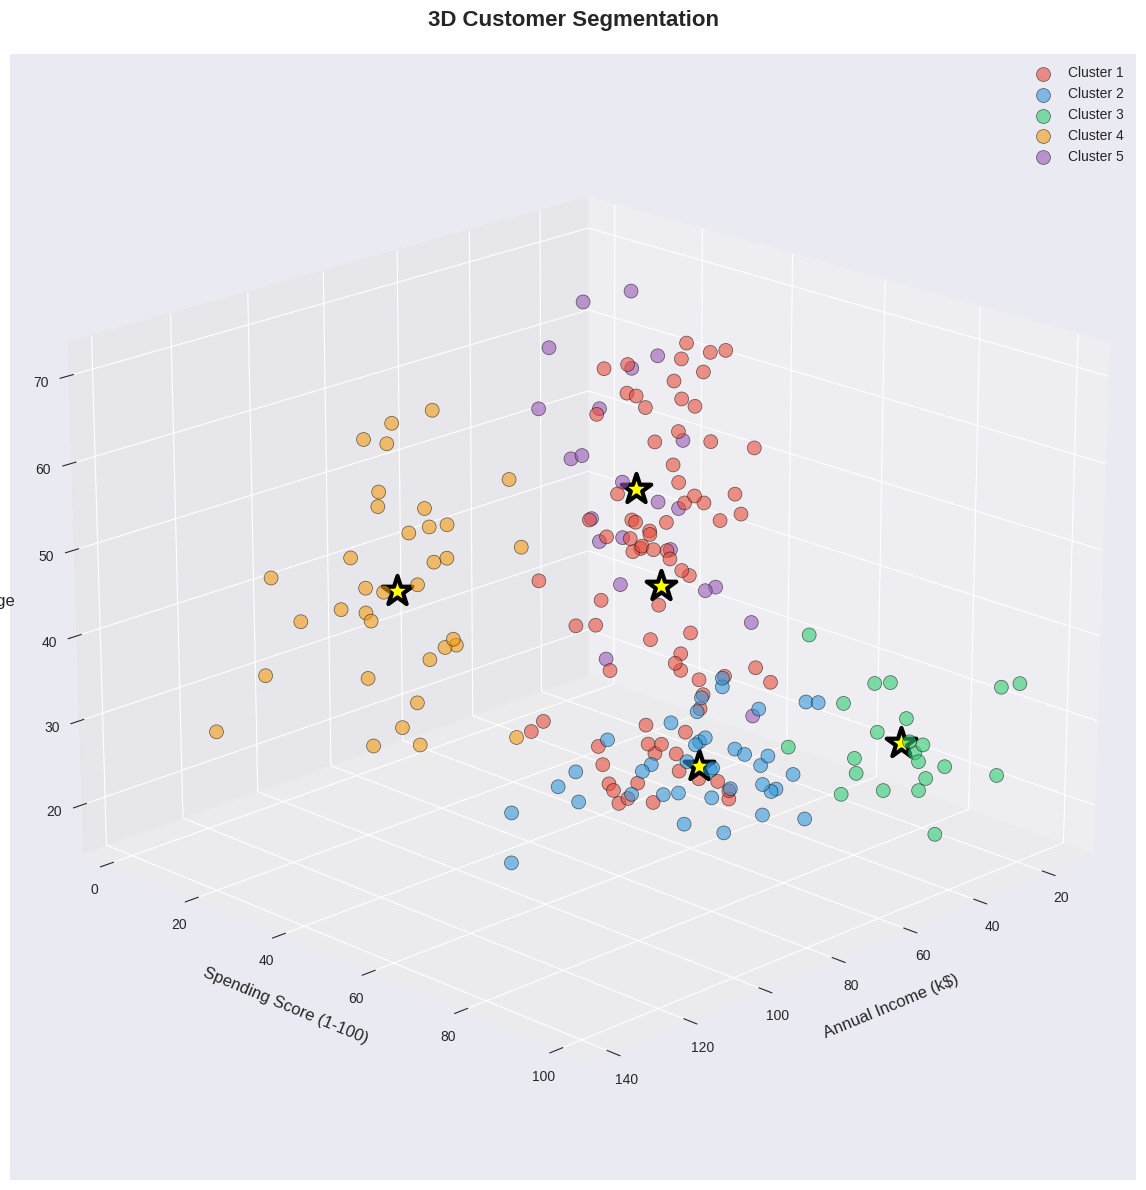

✅ 3D visualization created!


In [7]:
# Optional: Create stunning 3D visualization
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(16, 12))

# 3D plot: Income vs Spending vs Age
ax = fig.add_subplot(111, projection='3d')

colors_3d = ['#e74c3c', '#3498db', '#2ecc71', '#f39c12', '#9b59b6']

for i in range(optimal_k):
    cluster_df = df[df['Cluster'] == i]
    ax.scatter(cluster_df['Annual Income (k$)'],
              cluster_df['Spending Score (1-100)'],
              cluster_df['Age'],
              c=colors_3d[i],
              s=100,
              alpha=0.6,
              edgecolors='black',
              linewidth=0.5,
              label=f'Cluster {i+1}')

# Plot centroids in 3D
for i in range(optimal_k):
    cluster_df = df[df['Cluster'] == i]
    cx = cluster_df['Annual Income (k$)'].mean()
    cy = cluster_df['Spending Score (1-100)'].mean()
    cz = cluster_df['Age'].mean()
    ax.scatter(cx, cy, cz, c='yellow', s=500, marker='*',
              edgecolors='black', linewidths=3, zorder=10)

ax.set_xlabel('Annual Income (k$)', fontsize=12, labelpad=10)
ax.set_ylabel('Spending Score (1-100)', fontsize=12, labelpad=10)
ax.set_zlabel('Age', fontsize=12, labelpad=10)
ax.set_title('3D Customer Segmentation', fontsize=16, fontweight='bold', pad=20)
ax.legend(loc='best', fontsize=10)

# Rotate for better view
ax.view_init(elev=20, azim=45)

plt.tight_layout()
plt.savefig('3d_cluster_visualization.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

print("✅ 3D visualization created!")

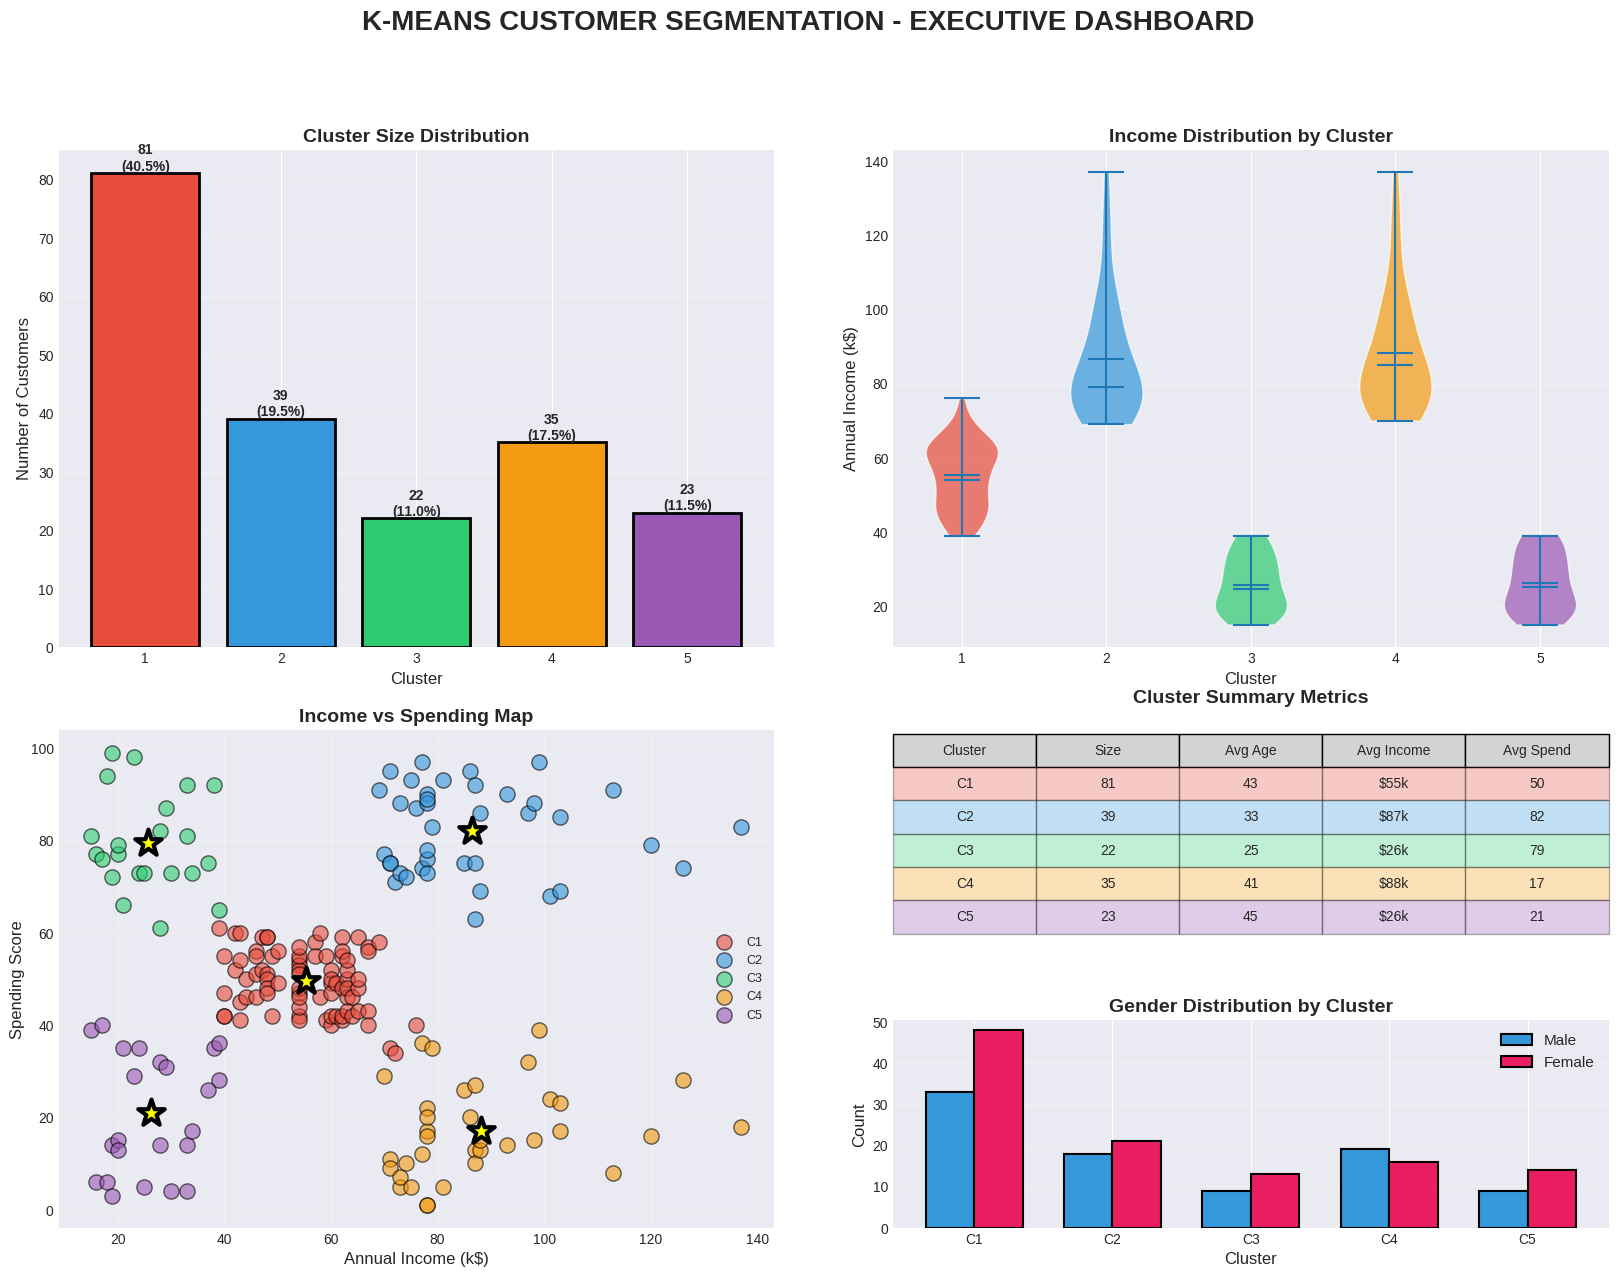

✅ Executive dashboard created!
📥 Saved as: executive_dashboard.png


In [11]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Clean up column names (remove leading/trailing spaces)
df.columns = df.columns.str.strip()

# Try to detect the gender column automatically
gender_col = None
for cand in ['Gender', 'gender', 'Genre', 'genre']:
    if cand in df.columns:
        gender_col = cand
        break

# Create interactive summary dashboard
fig = plt.figure(figsize=(20, 14))
fig.suptitle('K-MEANS CUSTOMER SEGMENTATION - EXECUTIVE DASHBOARD',
             fontsize=20, fontweight='bold', y=0.98)

# Create grid
gs = fig.add_gridspec(4, 4, hspace=0.4, wspace=0.4)

# 1. Cluster Distribution (Top Left)
ax1 = fig.add_subplot(gs[0:2, 0:2])
cluster_sizes = [sum(y_kmeans == i) for i in range(optimal_k)]
bars = ax1.bar(range(1, optimal_k+1), cluster_sizes, color=colors, edgecolor='black', linewidth=2)
ax1.set_title('Cluster Size Distribution', fontweight='bold', fontsize=14)
ax1.set_xlabel('Cluster', fontsize=12)
ax1.set_ylabel('Number of Customers', fontsize=12)
ax1.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    ax1.text(
        bar.get_x() + bar.get_width()/2.,
        height,
        f'{int(height)}\n({height/len(df)*100:.1f}%)',
        ha='center', va='bottom', fontweight='bold', fontsize=10
    )

# 2. Income Distribution by Cluster (Top Right)
ax2 = fig.add_subplot(gs[0:2, 2:4])
income_data = [df[df['Cluster'] == i]['Annual Income (k$)'].values for i in range(optimal_k)]
bp = ax2.violinplot(
    income_data,
    positions=range(1, optimal_k+1),
    showmeans=True,
    showmedians=True
)

for i, pc in enumerate(bp['bodies']):
    pc.set_facecolor(colors[i])
    pc.set_alpha(0.7)

ax2.set_title('Income Distribution by Cluster', fontweight='bold', fontsize=14)
ax2.set_xlabel('Cluster', fontsize=12)
ax2.set_ylabel('Annual Income (k$)', fontsize=12)
ax2.grid(axis='y', alpha=0.3)

# 3. Spending vs Income Scatter (Middle Left)
ax3 = fig.add_subplot(gs[2:4, 0:2])
for i in range(optimal_k):
    cluster_data = X[y_kmeans == i]
    ax3.scatter(
        cluster_data[:, 0],
        cluster_data[:, 1],
        s=120,
        c=colors[i],
        alpha=0.6,
        edgecolors='black',
        linewidth=1,
        label=f'C{i+1}'
    )

# Inverse-transform centroids back to original scale
centroids = scaler.inverse_transform(kmeans.cluster_centers_)

# Use a valid marker for centroids
ax3.scatter(
    centroids[:, 0],
    centroids[:, 1],
    s=400,
    c='yellow',
    marker='*',
    edgecolors='black',
    linewidths=3,
    zorder=10
)

ax3.set_title('Income vs Spending Map', fontweight='bold', fontsize=14)
ax3.set_xlabel('Annual Income (k$)', fontsize=12)
ax3.set_ylabel('Spending Score', fontsize=12)
ax3.legend(loc='best', fontsize=9)
ax3.grid(True, alpha=0.3)

# 4. Key Metrics Table (Middle Right)
ax4 = fig.add_subplot(gs[2, 2:4])
ax4.axis('off')

metrics_data = []
for i in range(optimal_k):
    cluster_df = df[df['Cluster'] == i]
    metrics_data.append([
        f'C{i+1}',
        len(cluster_df),
        f"{cluster_df['Age'].mean():.0f}",
        f"${cluster_df['Annual Income (k$)'].mean():.0f}k",
        f"{cluster_df['Spending Score (1-100)'].mean():.0f}"
    ])

table = ax4.table(
    cellText=metrics_data,
    colLabels=['Cluster', 'Size', 'Avg Age', 'Avg Income', 'Avg Spend'],
    cellLoc='center',
    loc='center',
    colColours=['lightgray'] * 5
)
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 2)

# Color code rows
for i in range(1, optimal_k + 1):
    for j in range(5):
        cell = table[(i, j)]
        cell.set_facecolor(colors[i-1])
        cell.set_alpha(0.3)

ax4.set_title('Cluster Summary Metrics', fontweight='bold', fontsize=14, pad=20)

# 5. Gender Distribution (Bottom Right)
ax5 = fig.add_subplot(gs[3, 2:4])

if gender_col is not None:
    # Compute male/female counts per cluster using detected gender column
    x_pos = np.arange(optimal_k)
    width = 0.35

    male_counts = [
        len(df[(df['Cluster'] == i) & (df[gender_col] == 'Male')])
        for i in range(optimal_k)
    ]
    female_counts = [
        len(df[(df['Cluster'] == i) & (df[gender_col] == 'Female')])
        for i in range(optimal_k)
    ]

    bars1 = ax5.bar(
        x_pos - width/2,
        male_counts,
        width,
        label='Male',
        color='#3498db',
        edgecolor='black',
        linewidth=1.5
    )
    bars2 = ax5.bar(
        x_pos + width/2,
        female_counts,
        width,
        label='Female',
        color='#e91e63',
        edgecolor='black',
        linewidth=1.5
    )

    ax5.set_title('Gender Distribution by Cluster', fontweight='bold', fontsize=14)
    ax5.set_xlabel('Cluster', fontsize=12)
    ax5.set_ylabel('Count', fontsize=12)
    ax5.set_xticks(x_pos)
    ax5.set_xticklabels([f'C{i+1}' for i in range(optimal_k)])
    ax5.legend(fontsize=11)
    ax5.grid(axis='y', alpha=0.3)
else:
    # If no gender column found, show a message instead of crashing
    ax5.axis('off')
    ax5.text(
        0.5, 0.5,
        'Gender column not found in dataset.\n(Gender chart skipped)',
        ha='center', va='center',
        fontsize=14, fontweight='bold'
    )

plt.savefig('executive_dashboard.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

print("✅ Executive dashboard created!")
print("📥 Saved as: executive_dashboard.png")


🎯 MODEL PERFORMANCE METRICS

📊 Clustering Quality Metrics:
   • Silhouette Score: 0.5547
     → Range: [-1, 1], Higher is better
     → Interpretation: Excellent

   • Davies-Bouldin Index: 0.5722
     → Lower is better (measures cluster separation)
     → Interpretation: Excellent

   • Calinski-Harabasz Score: 248.65
     → Higher is better (ratio of between/within cluster variance)
     → Interpretation: Good

   • Within-Cluster Sum of Squares (WCSS): 65.57
   • Iterations to Converge: 4


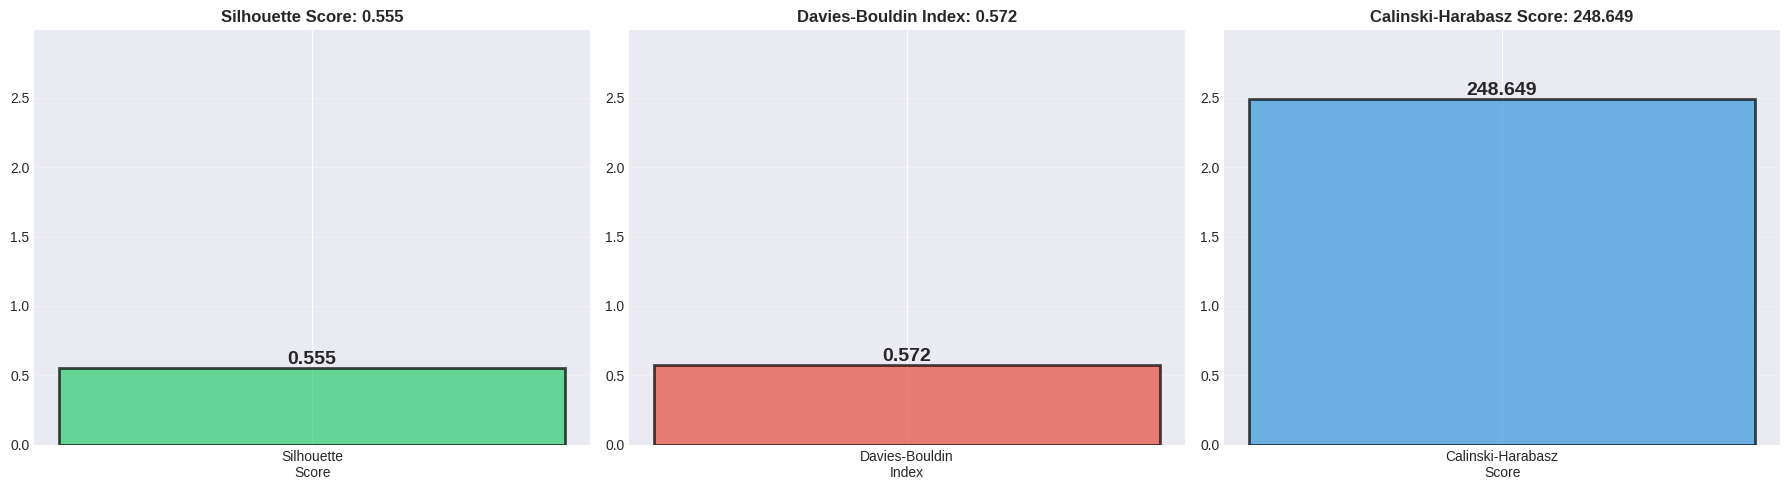


✅ Performance metrics visualization created!


In [9]:
# Calculate advanced performance metrics
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score

print("="*70)
print("🎯 MODEL PERFORMANCE METRICS")
print("="*70)

# Calculate metrics
silhouette = silhouette_score(X_scaled, y_kmeans)
davies_bouldin = davies_bouldin_score(X_scaled, y_kmeans)
calinski_harabasz = calinski_harabasz_score(X_scaled, y_kmeans)

print(f"\n📊 Clustering Quality Metrics:")
print(f"   • Silhouette Score: {silhouette:.4f}")
print(f"     → Range: [-1, 1], Higher is better")
print(f"     → Interpretation: {'Excellent' if silhouette > 0.5 else 'Good' if silhouette > 0.3 else 'Fair'}")

print(f"\n   • Davies-Bouldin Index: {davies_bouldin:.4f}")
print(f"     → Lower is better (measures cluster separation)")
print(f"     → Interpretation: {'Excellent' if davies_bouldin < 1 else 'Good' if davies_bouldin < 2 else 'Fair'}")

print(f"\n   • Calinski-Harabasz Score: {calinski_harabasz:.2f}")
print(f"     → Higher is better (ratio of between/within cluster variance)")
print(f"     → Interpretation: {'Excellent' if calinski_harabasz > 300 else 'Good' if calinski_harabasz > 200 else 'Fair'}")

print(f"\n   • Within-Cluster Sum of Squares (WCSS): {kmeans.inertia_:.2f}")
print(f"   • Iterations to Converge: {kmeans.n_iter_}")

# Create performance visualization
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Metric 1: Silhouette Score
metrics_names = ['Silhouette\nScore', 'Davies-Bouldin\nIndex', 'Calinski-Harabasz\nScore']
metrics_values = [silhouette, davies_bouldin, calinski_harabasz/100]  # Normalized
colors_metric = ['#2ecc71', '#e74c3c', '#3498db']

for idx, (ax, name, value, color) in enumerate(zip(axes, metrics_names, metrics_values, colors_metric)):
    ax.bar([name], [value], color=color, edgecolor='black', linewidth=2, alpha=0.7)
    ax.set_ylim(0, max(metrics_values) * 1.2)
    ax.set_title(f'{name.replace(chr(10), " ")}: {[silhouette, davies_bouldin, calinski_harabasz][idx]:.3f}',
                fontweight='bold', fontsize=12)
    ax.grid(axis='y', alpha=0.3)

    # Add value label
    ax.text(0, value, f'{[silhouette, davies_bouldin, calinski_harabasz][idx]:.3f}',
           ha='center', va='bottom', fontweight='bold', fontsize=14)

plt.tight_layout()
plt.savefig('performance_metrics.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

print("\n✅ Performance metrics visualization created!")
